In [50]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os # need for file enumeration
import random
from sklearn.model_selection import train_test_split, GridSearchCV


# CNN
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import utils,losses
# pre-trained
from tensorflow.keras.applications import MobileNetV2,MobileNet,VGG19
from tensorflow.keras.applications import EfficientNetB7

import tensorflow as tf

# some more image preprocessing
from tensorflow.keras.layers import RandomBrightness, RandomContrast, RandomCrop, RandomFlip
from tensorflow.keras.layers import RandomHeight, RandomRotation, RandomTranslation
from tensorflow.keras.layers import RandomWidth, RandomZoom

import skimage
import cv2
from PIL.ExifTags import TAGS
from PIL import ExifTags
from PIL import Image

from os import listdir
from os.path import isfile, join

import keras.applications
# from tensorflow.keras_vggface.vggface import vg
# from keras_vggface.vggface import VGGFace

# metrics
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay, confusion_matrix

#
import gc

# reloads module to update
import universal_methods
import importlib
importlib.reload(universal_methods)
# .py file with universal methods, that I use more than one time in this project
from universal_methods import Universal

# For reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

## Data Acquisition

In [5]:
X,y,class_labels=Universal().get_images()
class_labels

Found 2041 images belonging to 2 classes.


['fake', 'real']

<Figure size 432x288 with 0 Axes>

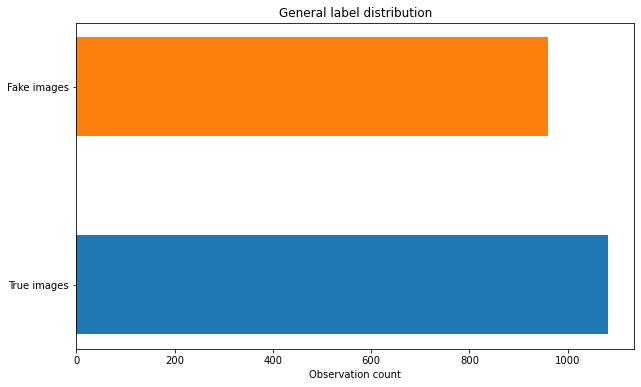

In [27]:
Universal().plot_proportions(y,"General label distribution")

- Simple model
-- Review, features, gradient, plan of model
- Pretrained model
-- Review, features, gradient, plan of model
- Pretrained model 2
-- Review, features, gradient, plan of model
- Simple model on easy dataset
-- Review, features, gradient, plan of model
- Simple model categorical
-- Review, features, gradient, plan of model
- Pretrained model categorical
-- Review, features, gradient, plan of model


Train-val-test split and shapes check

In [19]:
X_train_temp,X_test,y_train_temp,y_test=train_test_split(X,y,random_state=42,stratify=y,test_size=0.1)
X_train,X_val,y_train,y_val=train_test_split(X_train_temp,y_train_temp,random_state=42,stratify=y_train_temp,test_size=0.11)
X_train.shape,y_train.shape,X_val.shape,y_val.shape, X_test.shape,y_test.shape

((1634, 600, 600, 3),
 (1634,),
 (202, 600, 600, 3),
 (202,),
 (205, 600, 600, 3),
 (205,))

Plot of classes proportion

<Figure size 432x288 with 0 Axes>

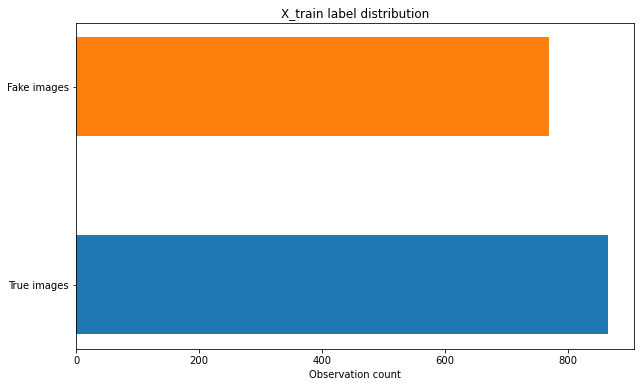

In [28]:
Universal().plot_proportions(y_train,"X_train label distribution")

<Figure size 432x288 with 0 Axes>

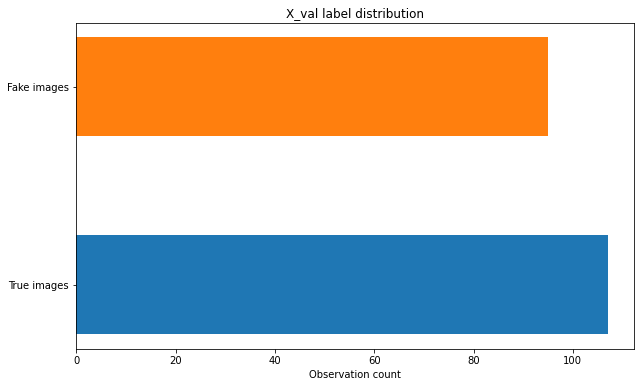

In [29]:
Universal().plot_proportions(y_val,"X_val label distribution")

<Figure size 432x288 with 0 Axes>

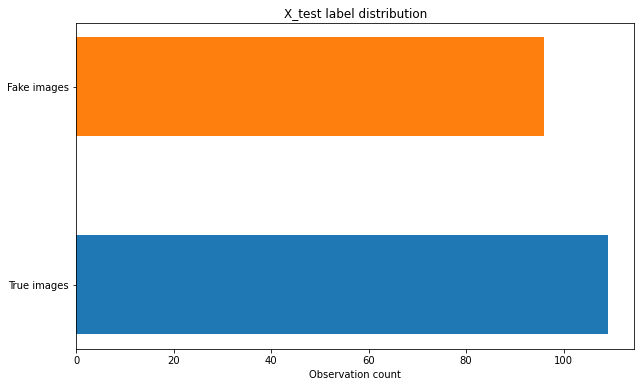

In [30]:
Universal().plot_proportions(y_test,"X_test label distribution")

## Modeling
----
##### Simple model 
First of all let's try to run our data through simple CNN.

In [54]:
# very simple CNN
model_simple = Sequential()
model_simple.add(Conv2D(filters = 8, kernel_size = (8, 8), activation = 'relu', input_shape = (600, 600, 3)))
model_simple.add(MaxPooling2D(pool_size = (3, 3)))
model_simple.add(Conv2D(filters = 8, kernel_size = (6, 6), activation = 'relu'))
model_simple.add(MaxPooling2D(pool_size = (2, 2)))
model_simple.add(Flatten())
model_simple.add(Dense(64, activation = 'relu'))
model_simple.add(Dense(1, activation = 'sigmoid'))
model_simple.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['acc'])
history_model_simple = model_simple.fit(
    X_train, y_train,
     batch_size = 32,
      epochs = 20,
       verbose = 1,
        validation_data = (X_val, y_val)
    )

Epoch 1/20


2022-11-07 21:20:23.908494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - ETA: 0s - loss: 0.6929 - acc: 0.5269

2022-11-07 21:20:41.979240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 19s 359ms/step - loss: 0.6929 - acc: 0.5269 - val_loss: 0.6958 - val_acc: 0.5297
Epoch 2/20
52/52 [==============================] - 17s 322ms/step - loss: 0.6925 - acc: 0.5294 - val_loss: 0.6959 - val_acc: 0.5297
Epoch 3/20
52/52 [==============================] - 17s 321ms/step - loss: 0.6922 - acc: 0.5294 - val_loss: 0.6962 - val_acc: 0.5297
Epoch 4/20
52/52 [==============================] - 17s 320ms/step - loss: 0.6920 - acc: 0.5294 - val_loss: 0.6964 - val_acc: 0.5297
Epoch 5/20
52/52 [==============================] - 17s 319ms/step - loss: 0.6919 - acc: 0.5294 - val_loss: 0.6966 - val_acc: 0.5297
Epoch 6/20
52/52 [==============================] - 17s 320ms/step - loss: 0.6917 - acc: 0.5294 - val_loss: 0.6969 - val_acc: 0.5297
Epoch 7/20
52/52 [==============================] - 17s 320ms/step - loss: 0.6916 - acc: 0.5294 - val_loss: 0.6971 - val_acc: 0.5297
Epoch 8/20
52/52 [==============================] - 17s 319ms/step - loss: 0.691

2022-11-07 21:40:17.401543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 139ms/step


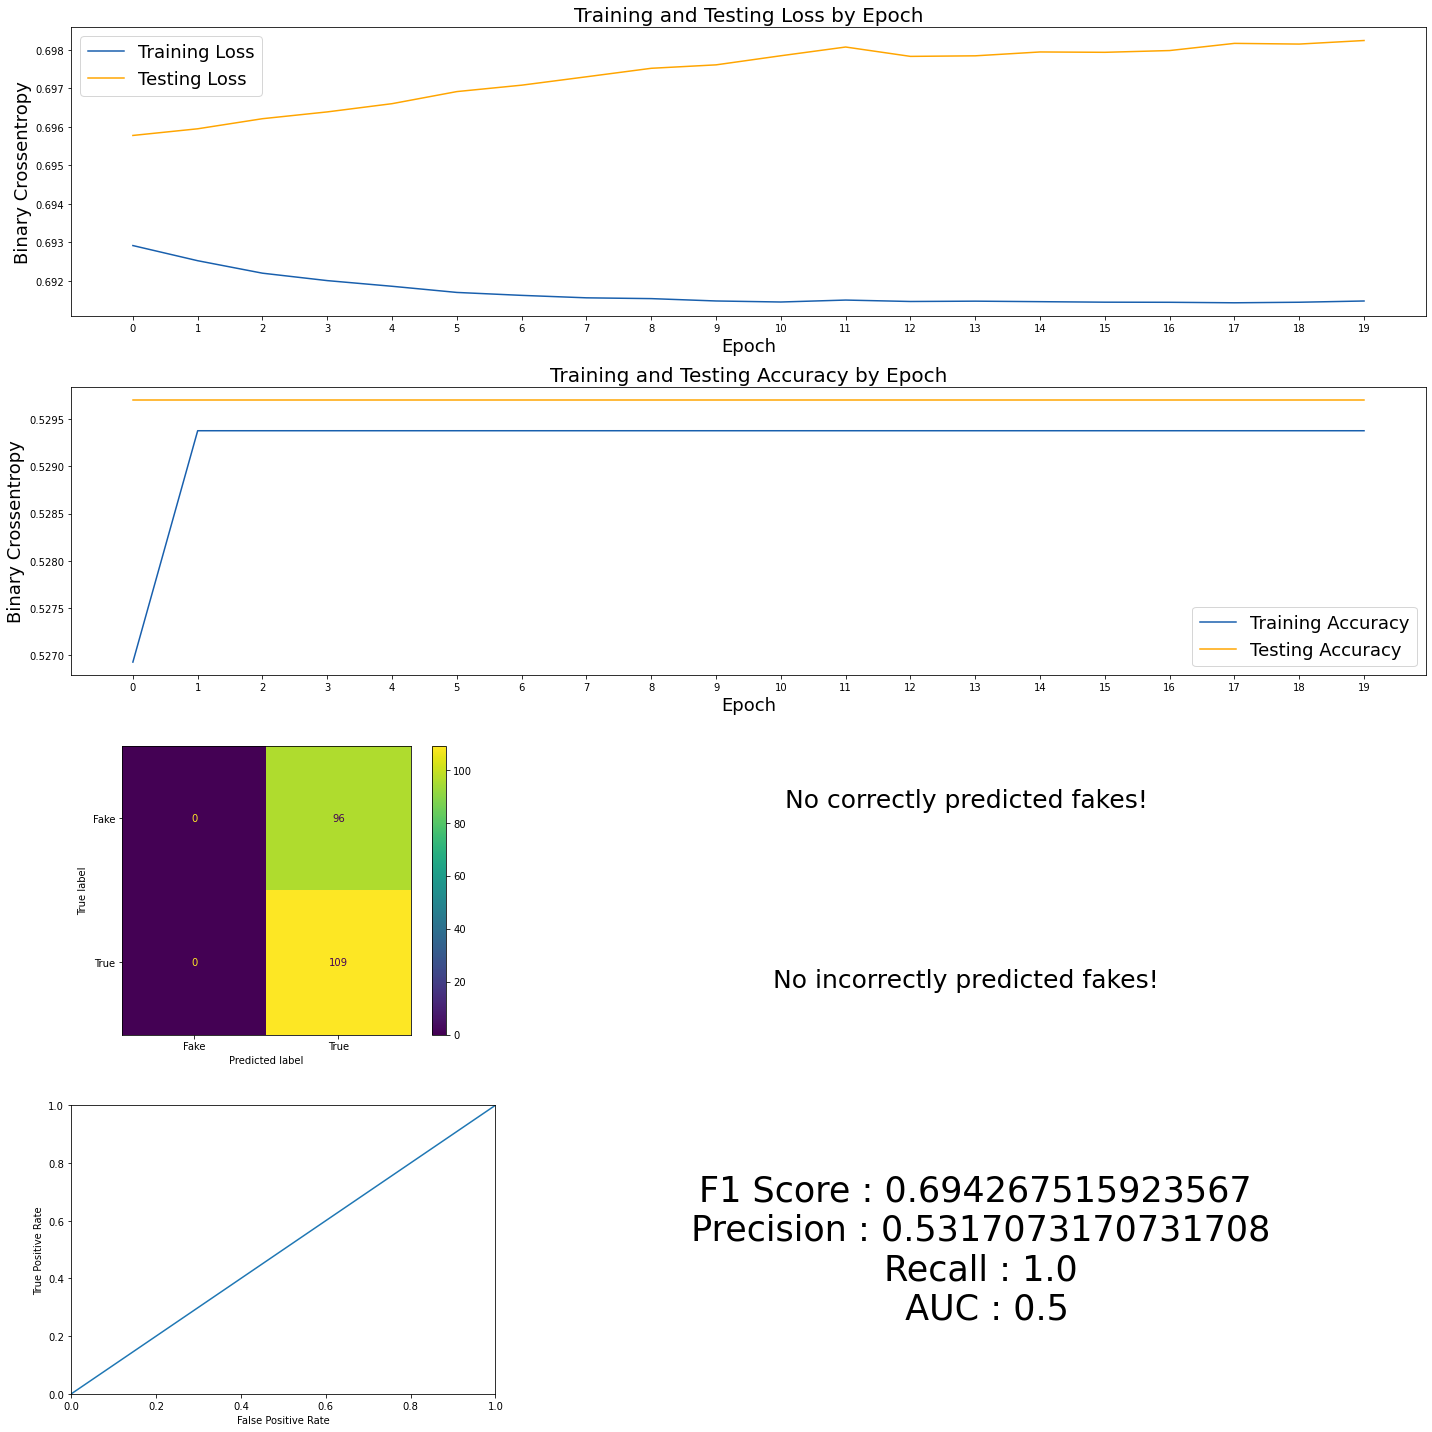

In [55]:
matches,mismatches,plot=Universal().plot_results_duo(history_model_simple,model_simple,X_test,y_test);

Confusion matrix shows that model cannot effectively catch the signal to correctly recognize and predict fakes. 
Test set totally contains 511 images, and model predicted that 486 of them are true (only 256 correctly).   
And predicted 25 fakes in total, and only 10 correctly.  

On the plot there are two sets of false positives and false negatives. It is not clear, why model caught exactly these images and missed others. My guess is because of some similarities with the training set.
ROC-AUC plot shows that true and false image sets are not just overlapping - for the model they are basically identically and it clearly doesn't learn as it should. This can be caused either by simplicity of the model, either by images which need more manipulation/augmentation to highlight their differences. To exclude model assumption, let's pass our dataset through much more powerful pre-trained model. 

In [56]:
# Display
from IPython.display import Image, display
import matplotlib.cm as cm

In [248]:
X_test.shape[2]

600

In [242]:
def grad_cam(model,X_test, image,pred_index=None):
    #https://keras.io/examples/vision/grad_cam/
    img_size = (X_test.shape[2],X_test.shape[3])
    conv_layers=[]
    for layer in model.layers:
        if 'conv' in str(layer):
            conv_layers.append(layer.name)
    last_conv_layer_name = conv_layers[-1]


    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(X_test)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    
    return heatmap.numpy()



In [243]:
# def get_img_array(img_path, size):
#     # `img` is a PIL image of size 299x299
#     img = keras.preprocessing.image.load_img(img_path, target_size=size)
#     # `array` is a float32 Numpy array of shape (299, 299, 3)
#     array = keras.preprocessing.image.img_to_array(img)
#     # We add a dimension to transform our array into a "batch"
#     # of size (1, 299, 299, 3)
#     array = np.expand_dims(array, axis=0)
#     return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

7/7 [==============================] - 1s 133ms/step


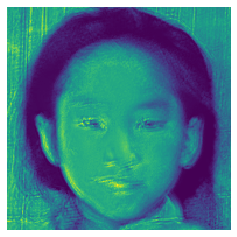

In [244]:
# Prepare image
# img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model =model_simple

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(X_test)
# print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(np.expand_dims(X_test[2], axis=0), model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.savefig("../resources/grid_cam/simple_model.jpg")
plt.show()

In [245]:
preds[2][0], class_labels[round(preds[0][0])], class_labels[int(y_test[2])]

(0.57897407, 'real', 'fake')

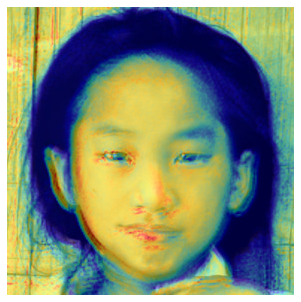

In [246]:
def save_and_display_gradcam(img_path, heatmap, cam_path="../resources/grid_cam/simple_cam.jpg", alpha=0.9):
    # Load the original image
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap =  cv2.normalize(heatmap, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    # superimposed_img.save(cam_path)

    # Display Grad CAM
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.imshow(X_test[2])
    # plt.savefig("../resources/grid_cam/orig.jpg",bbox_inches = 'tight',
    # pad_inches = 0)
    plt.imshow(superimposed_img)
    # display(Image(filename=cam_path))


save_and_display_gradcam("../resources/grid_cam/orig.jpg", heatmap=heatmap)

In [211]:
Universal().get_feat(model_simple,X_test[matches[1]],layer_num=2);

IndexError: list index out of range

Here are example of feature for correctly and incorrectly predicted fakes. These plots show how model's convolution layer sees images and what actual part of images are used for training

1/1 [==============================] - 0s 49ms/step


2022-11-06 00:16:29.471363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


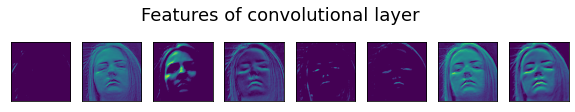

In [20]:
Universal().get_feat(model_simple,X_test[mismatches[1]],2);

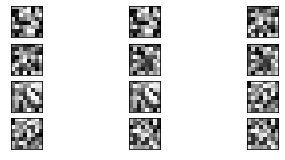

In [213]:
Universal().get_filters(model_simple,0)

In [52]:
# free-up memory
del model_simple
gc.collect()
tf.keras.backend.clear_session()

----

##### Pre-trained model

In [23]:
pretrained_model = VGG19(input_shape=[600,600,3], include_top=False)
pretrained_model.trainable = False;

In [6]:
model_trans=Sequential()
model_trans.add(pretrained_model)
model_trans.add(Flatten())

model_trans.add(Dense(128,activation="relu"))
model_trans.add(Dense(64,activation="relu"))
model_trans.add(Dense(6,activation="softmax"))
model_trans.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['acc'])
history_cnn_trans=model_trans.fit(X_train,y_train,batch_size=16,validation_data=(X_test,y_test),epochs=5,verbose=1)


NameError: name 'pretrained_model' is not defined

2022-11-06 00:30:41.098810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 40s 3s/step


/Users/glebradchenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


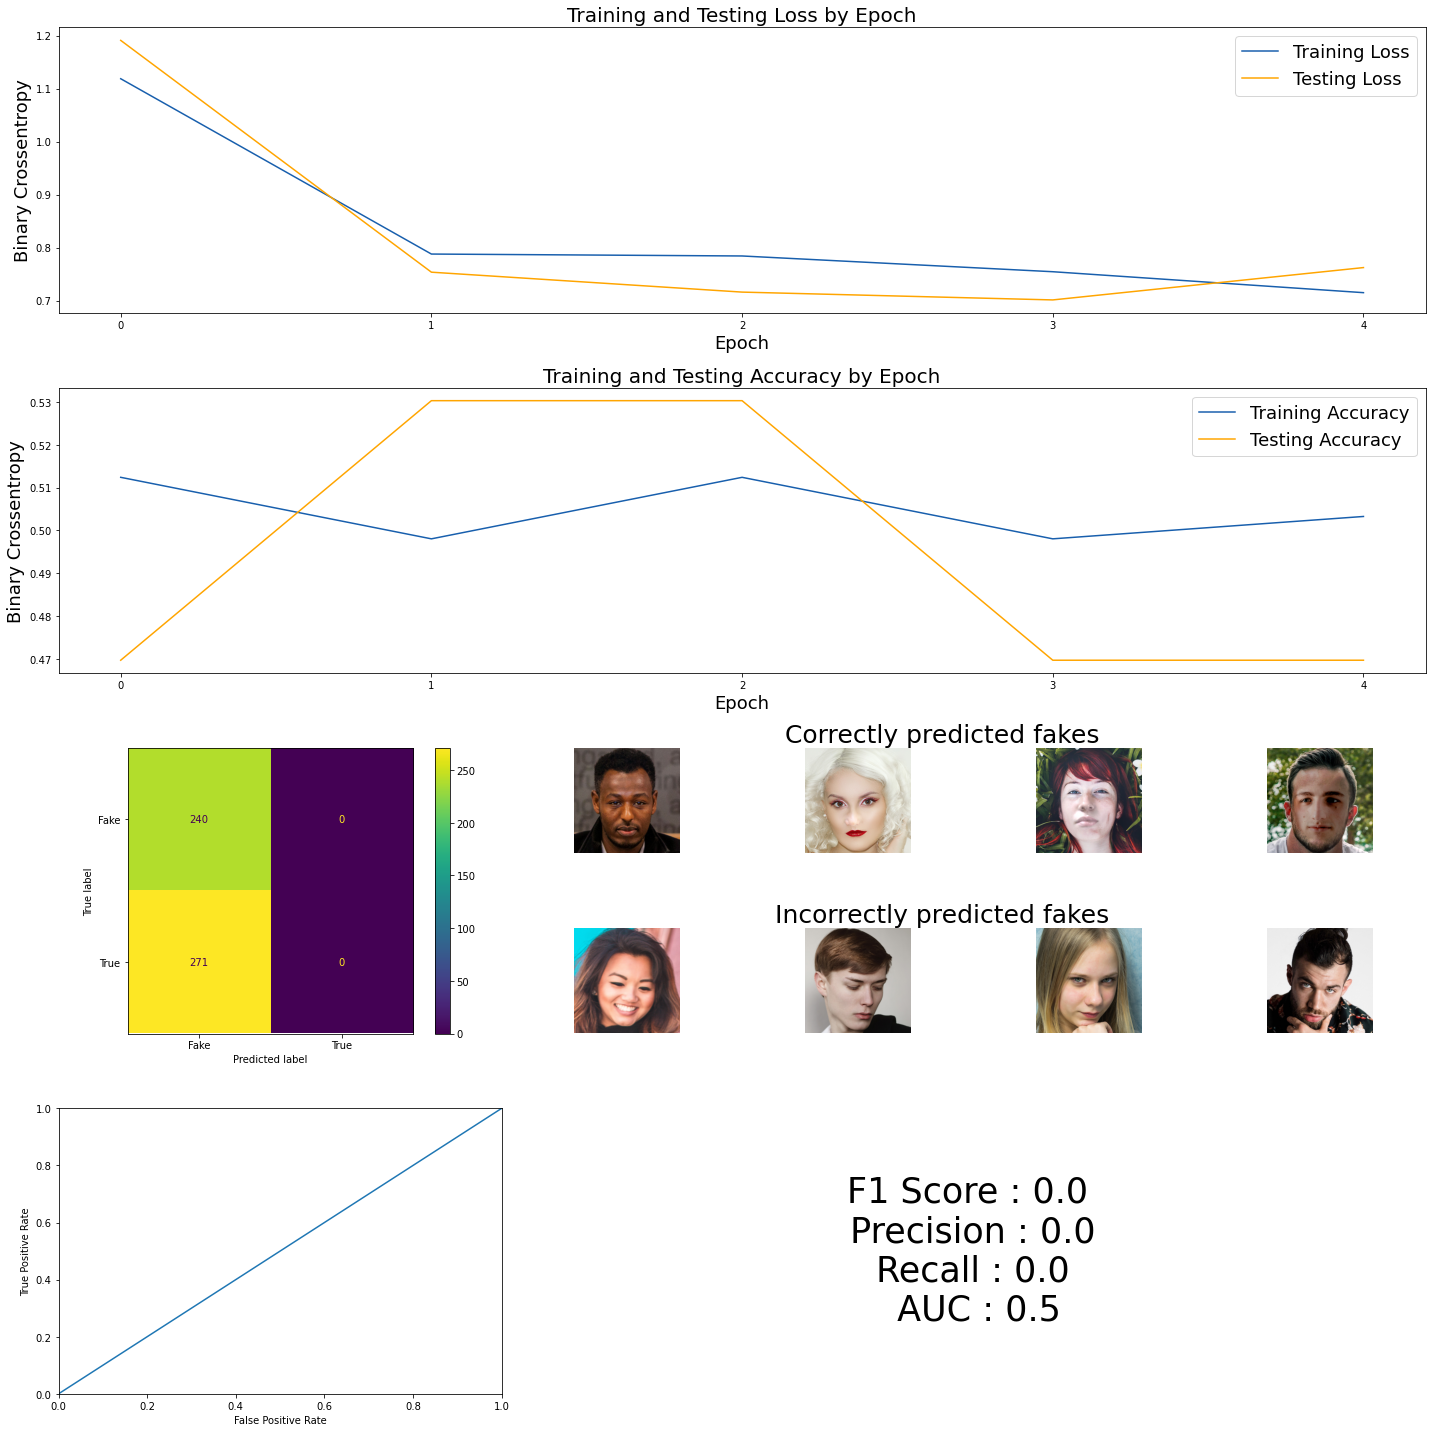

In [25]:
matches_2,mismatches_2, plot=Universal().plot_results_duo(history_cnn_trans,model_trans,X_test,y_test);

In [26]:
Universal().get_feat(model_trans,X_test[matches_2[1]],layer_num=2);

In [27]:
Universal().get_feat(model_trans,X_test[mismatches_2[1]],2);

In [28]:
Universal().get_filters(model_trans,0)

'Not a convalutional layer'

----
##### Pretrained model 2

In [35]:
pretrained_model_eff_net = EfficientNetB7(include_top=False, weights='imagenet',input_shape=(150,150,3))
pretrained_model_eff_net.trainable=False



In [36]:
model_trans_eff=Sequential()
model_trans_eff.add(pretrained_model_eff_net)
model_trans_eff.add(Flatten())

model_trans_eff.add(Dense(128,activation="relu"))
model_trans_eff.add(Dense(64,activation="relu"))
model_trans_eff.add(Dense(1,activation="sigmoid"))
model_trans_eff.compile(loss="binary_crossentropy",optimizer='adam',metrics=['acc'])
history_cnn_trans_eff=model_trans_eff.fit(X_train,y_train,batch_size=16,validation_data=(X_test,y_test),epochs=20,verbose=1)


Epoch 1/20


2022-11-07 19:52:08.616843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 6.5093 - acc: 0.4932

2022-11-07 19:52:29.906760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 46s 1s/step - loss: 6.5093 - acc: 0.4932 - val_loss: 5.0294 - val_acc: 0.4878
Epoch 2/20
24/24 [==============================] - 8s 307ms/step - loss: 2.0486 - acc: 0.4986 - val_loss: 3.6983 - val_acc: 0.4878
Epoch 3/20
24/24 [==============================] - 6s 269ms/step - loss: 1.8486 - acc: 0.5149 - val_loss: 1.8710 - val_acc: 0.5122
Epoch 4/20
24/24 [==============================] - 6s 241ms/step - loss: 2.1461 - acc: 0.4661 - val_loss: 0.6984 - val_acc: 0.4878
Epoch 5/20
24/24 [==============================] - 10s 431ms/step - loss: 0.9768 - acc: 0.5041 - val_loss: 1.0183 - val_acc: 0.5122
Epoch 6/20
24/24 [==============================] - 6s 247ms/step - loss: 0.8630 - acc: 0.5556 - val_loss: 1.2619 - val_acc: 0.4878
Epoch 7/20
24/24 [==============================] - 8s 321ms/step - loss: 0.9972 - acc: 0.4743 - val_loss: 1.5893 - val_acc: 0.5122
Epoch 8/20
24/24 [==============================] - 7s 270ms/step - loss: 1.0237 - acc: 

2022-11-07 19:55:37.829106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 29s 5s/step


/Users/glebradchenko/Desktop/VSCode_test/capstone/code/universal_methods.py:250: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


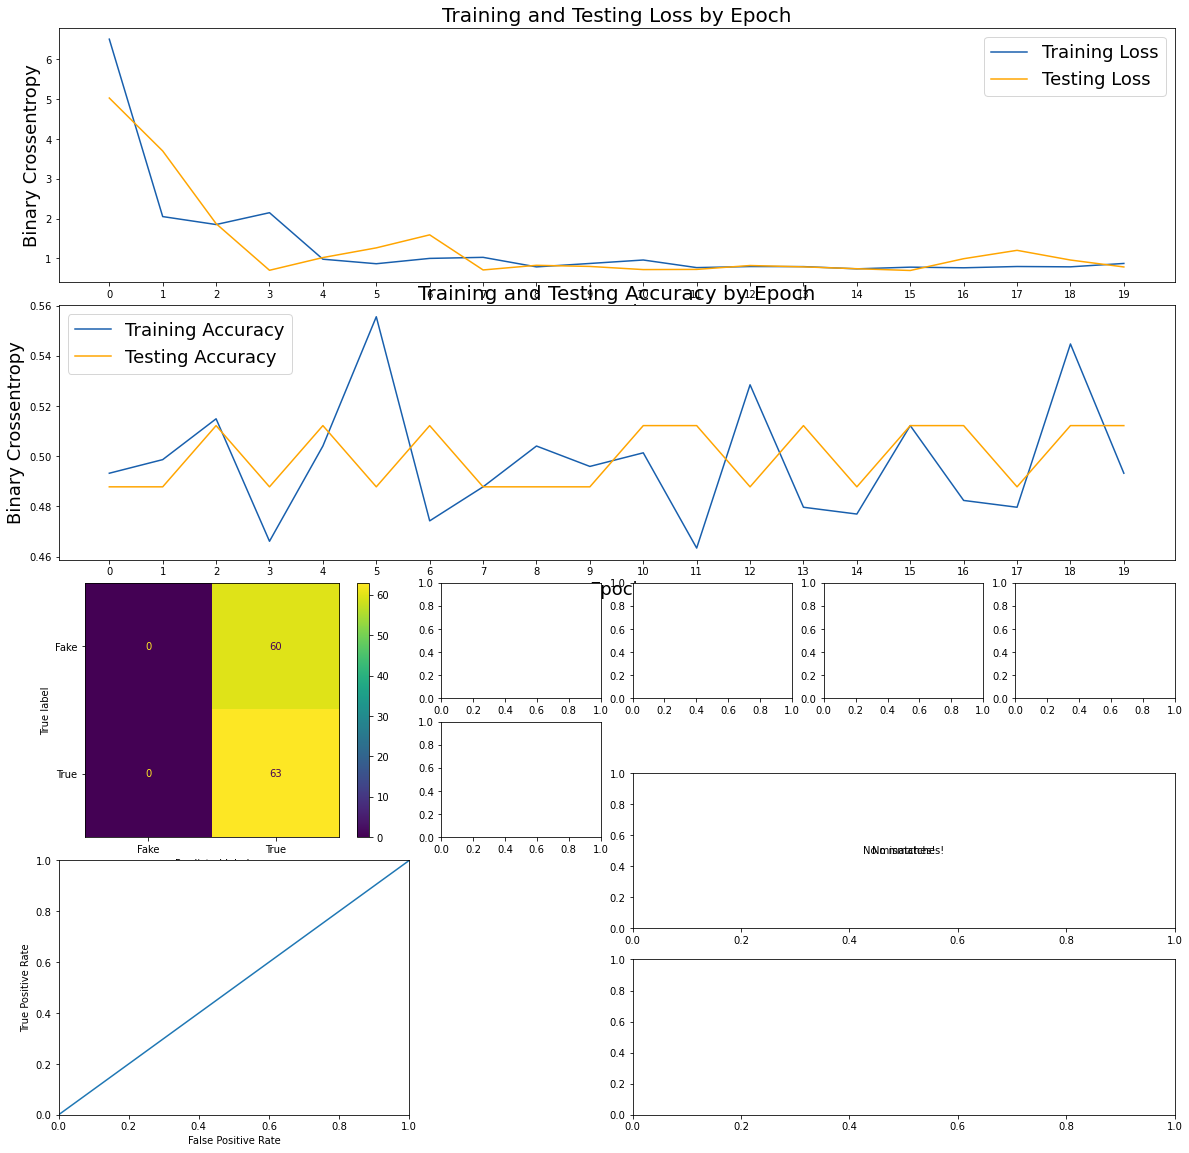

In [37]:
matches_3,mismatches_3, plot=Universal().plot_results_duo(history_cnn_trans_eff,model_trans_eff,X_test,y_test);

In [32]:
Universal().get_feat(model_trans_eff,X_test[matches_3[1]],layer_num=2);

In [33]:
Universal().get_feat(model_trans_eff,X_test[mismatches_3[1]],2);

In [34]:
Universal().get_filters(model_trans_eff,0)

'Not a convalutional layer'

----
##### Modeling
https://github.com/nii-yamagishilab/MesoNet#

In [26]:
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from keras.optimizers import Adam

In [36]:

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (6, 6), activation = 'relu', input_shape = (600, 600, 3)))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(filters = 8, kernel_size = (6, 6), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))



Epoch 1/10


2022-11-06 01:13:15.087065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 0.6930 - acc: 0.5203

2022-11-06 01:13:35.212372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 26s 2s/step - loss: 0.6930 - acc: 0.5203 - val_loss: 0.7724 - val_acc: 0.4716
Epoch 2/10
12/12 [==============================] - 13s 1s/step - loss: 0.6928 - acc: 0.5294 - val_loss: 0.7712 - val_acc: 0.4716
Epoch 3/10
12/12 [==============================] - 16s 1s/step - loss: 0.6927 - acc: 0.5294 - val_loss: 0.7699 - val_acc: 0.4697
Epoch 4/10
12/12 [==============================] - 15s 1s/step - loss: 0.6925 - acc: 0.5294 - val_loss: 0.7689 - val_acc: 0.4697
Epoch 5/10
12/12 [==============================] - 14s 1s/step - loss: 0.6924 - acc: 0.5294 - val_loss: 0.7676 - val_acc: 0.4697
Epoch 6/10
12/12 [==============================] - 14s 1s/step - loss: 0.6922 - acc: 0.5294 - val_loss: 0.7668 - val_acc: 0.4697
Epoch 7/10
12/12 [==============================] - 323s 1s/step - loss: 0.6921 - acc: 0.5294 - val_loss: 0.7661 - val_acc: 0.4697
Epoch 8/10
12/12 [==============================] - 14s 1s/step - loss: 0.6920 - acc: 0.5294 - val_l

In [28]:
model_git=Sequential()
model_git.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation = 'relu'))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(8, (5, 5), padding='same', activation = 'relu'))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
model_git.add(Flatten())
model_git.add(Dropout(0.5))
model_git.add(Dense(16))
model_git.add(LeakyReLU(alpha=0.1))
model_git.add(Dropout(0.5))
model_git.add(Dense(1, activation = 'sigmoid'))
model_git.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
history_git=model_git.fit(X_train, y_train, batch_size = 128, epochs = 40, verbose = 1, validation_data = (X_test, y_test))


Epoch 1/40


2022-11-07 19:50:28.642527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 279ms/step - loss: 1.4316 - acc: 0.5122 - val_loss: 0.6932 - val_acc: 0.4878
Epoch 2/40


2022-11-07 19:50:29.530368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 92ms/step - loss: 1.0909 - acc: 0.4851 - val_loss: 0.6926 - val_acc: 0.4878
Epoch 3/40
3/3 [==============================] - 0s 87ms/step - loss: 0.9076 - acc: 0.5556 - val_loss: 0.6917 - val_acc: 0.5447
Epoch 4/40
3/3 [==============================] - 0s 83ms/step - loss: 0.8570 - acc: 0.5339 - val_loss: 0.6914 - val_acc: 0.5203
Epoch 5/40
3/3 [==============================] - 0s 81ms/step - loss: 0.8492 - acc: 0.5203 - val_loss: 0.6927 - val_acc: 0.5122
Epoch 6/40
3/3 [==============================] - 0s 89ms/step - loss: 0.7561 - acc: 0.5501 - val_loss: 0.6935 - val_acc: 0.5122
Epoch 7/40
3/3 [==============================] - 0s 88ms/step - loss: 0.7776 - acc: 0.5339 - val_loss: 0.6933 - val_acc: 0.5122
Epoch 8/40
3/3 [==============================] - 0s 81ms/step - loss: 0.7585 - acc: 0.5285 - val_loss: 0.6937 - val_acc: 0.5122
Epoch 9/40
3/3 [==============================] - 0s 112ms/step - loss: 0.7871 - acc: 0.5285 - val_loss: 0.6

4/4 [==============================] - 1s 30ms/step


2022-11-07 19:50:43.934292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/glebradchenko/Desktop/VSCode_test/capstone/code/universal_methods.py:250: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


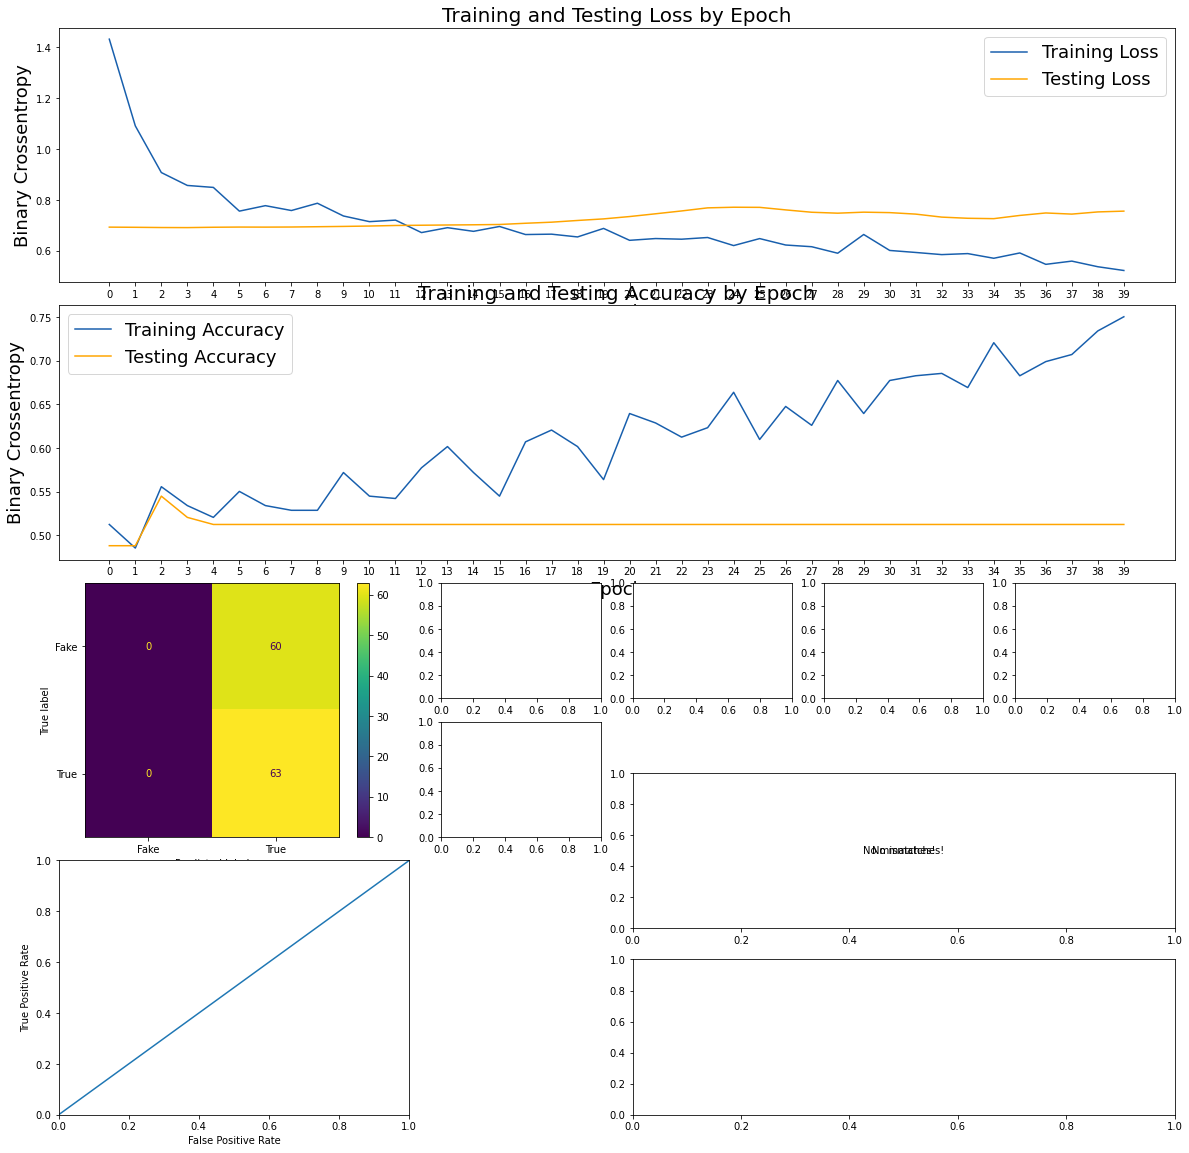

In [29]:
matches_4,mismatches_4, plot=Universal().plot_results_duo(history_git,model_git,X_test,y_test);

In [30]:
Universal().get_feat(model_git,X_test[matches_4[1]],layer_num=0);

IndexError: list index out of range

In [32]:
Universal().get_feat(model_git,X_test[mismatches_4[1]],2);

IndexError: list index out of range

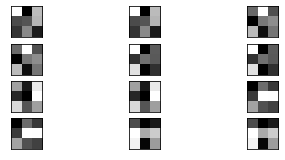

In [31]:
Universal().get_filters(model_git,0)

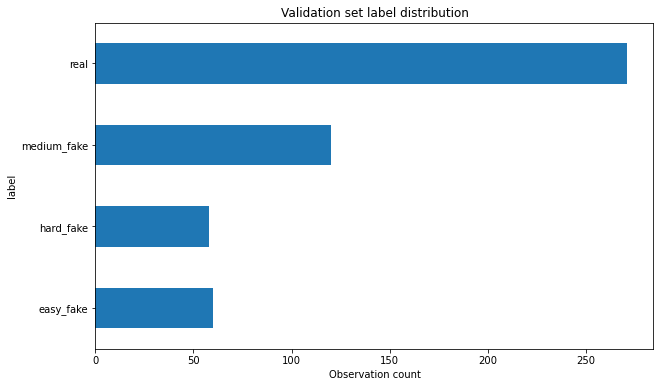

In [19]:
# how's our distribution of labels in the validation set? GABE CODE!
# plot for classes distribution of multiclass dataset.
plt.figure(figsize = (10, 6))
plt.title('Validation set label distribution')
plt.xlabel('Observation count')
val_class_labels = pd.DataFrame([class_labels[np.argmax(x)] for x in y_test], columns = ['label'])
val_class_groups = val_class_labels.groupby('label')['label'].count()
val_class_groups.plot.barh();

!!! Optimize for different metrics